In [20]:
%plot --format svg

# Optimization

Many problems involve finding a minimum or maximum based on given constraints. Engineers and scientists typically use energy balance equations to find the conditions of minimum energy, but this value may never go to 0 and the actual value of energy may not be of interest. 

# Lennard-Jones potential

The Lennard-Jones potential is commonly used to model interatomic bonding. 

$E_{LJ}(x)=4\epsilon \left(\left(\frac{\sigma}{x}\right)^{12}-\left(\frac{\sigma}{x}\right)^{6}\right)$

Considering a 1-D gold chain, we can calculate the bond length, $x_{b}$, with no force applied to the chain and even for tension, F. This will allow us to calculate the nonlinear spring constant of a 1-D gold chain. 

![TEM image of Gold chain](au_chain.jpg)

Computational Tools to Study and Predict the Long-Term Stability of Nanowires.
By Martin E. Zoloff Michoff, Patricio Vélez, Sergio A. Dassie and Ezequiel P. M. Leiva 

![Model of Gold chain, from molecular dynamics simulation](Auchain_model.png)

[Single atom gold chain mechanics](http://www.uam.es/personal_pdi/ciencias/agrait/)

### First, let's find the minimum energy $\min(E_{LJ}(x))$

## Brute force

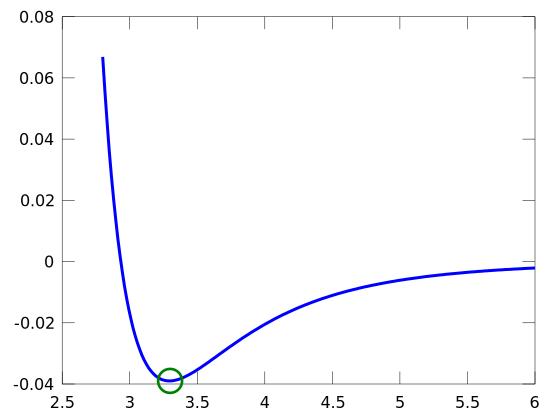

In [39]:
function E_LJ =lennard_jones(x,sigma,epsilon)
  E_LJ = 4*epsilon*((sigma./x).^12-(sigma./x).^6);
end

setdefaults
epsilon = 0.039; % kcal/mol
sigma = 2.934; % Angstrom
x=linspace(2.8,6,200); % bond length in Angstrom

Ex = lennard_jones(x,sigma,epsilon);

[Emin,imin]=min(Ex);

plot(x,Ex,x(imin),Emin,'o')

In [40]:
x(imin-1)
x(imin)
x(imin+1)

ans =  3.2824
ans =  3.2985
ans =  3.3146


## Golden Search Algorithm

We can't just look for a sign change for the problem (unless we can take a derivative) so we need a new approach to determine whether we have a maximum between the two bounds.

Rather than using the midpoint of initial bounds, here the problem is more difficult. We need to compare the values of 4 function evaluations. The golden search uses the golden ratio to determine two interior points. 

![golden ratio](goldenratio.png)

Start with bounds of 2.5 and 6 Angstrom. 

In [41]:
% define Au atomic potential
epsilon = 0.039; % kcal/mol
sigma = 2.934; % Angstrom
Au_x= @(x) lennard_jones(x,sigma,epsilon);

% calculate golden ratio
phi = 1/2+sqrt(5)/2;
% set initial limits
x_l=2.8; 
x_u=6; 

% Iteration #1
d=(phi-1)*(x_u-x_l);

x1=x_l+d; % define point 1
x2=x_u-d; % define point 2
% evaluate Au_x(x1) and Au_x(x2)

f1=Au_x(x1);
f2=Au_x(x2);

current_min = -0.019959


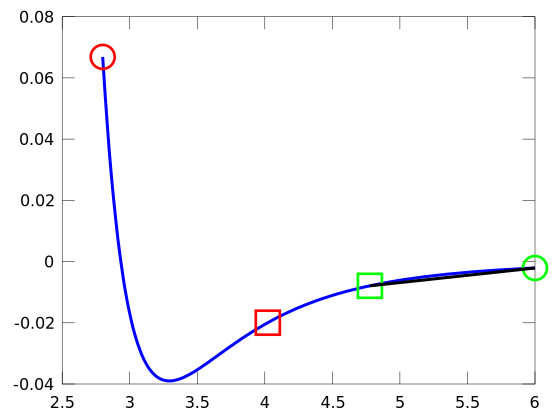

In [42]:

plot(x,Au_x(x),x_l,Au_x(x_l),'ro',...
x2,f2,'rs',x1,f1,'gs',x_u,Au_x(x_u),'go')
hold on;

if f2<f1
    plot([x_u,x1],[Au_x(x_u),f1],'k-')
    x_u=x1;
else 
    plot([x_l,x2],[Au_x(x_l),f2],'k-')
    x_l=x1;
end
hold off
%old_min = current_min;
current_min=min([f1,f2,Au_x(x_l),Au_x(x_u)])
%error_app=abs((current_min-old_min)/current_min)

In [43]:
% Iteration #2
d=(phi-1)*(x_u-x_l);

x1=x_l+d; % define point 1
x2=x_u-d; % define point 2

f1=Au_x(x1);
f2=Au_x(x2);

current_min = -0.033707
error_app =  0.40787


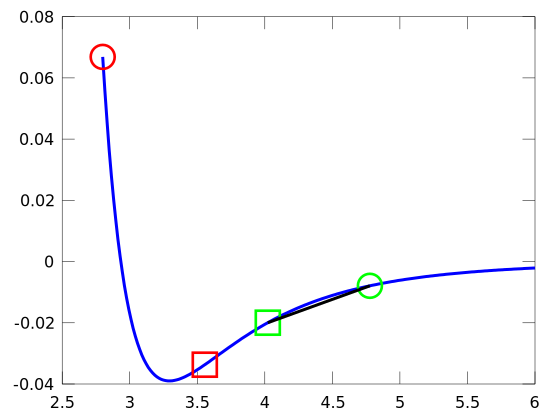

In [44]:
plot(x,Au_x(x),x_l,Au_x(x_l),'ro',x2,f2,'rs',x1,f1,'gs',x_u,Au_x(x_u),'go')
hold on;
if f2<f1
    plot([x_u,x1],[Au_x(x_u),f1],'k-')
    x_u=x1;
else 
    plot([x_l,x2],[Au_x(x_l),f2],'k-')
    x_l=x1;
end
hold off
old_min = current_min;
current_min=min([f1,f2,Au_x(x_l),Au_x(x_u)])
error_app=abs((current_min-old_min)/current_min)

In [46]:
% Iteration #3
d=(phi-1)*(x_u-x_l);

x1=x_l+d; % define point 1
x2=x_u-d; % define point 2

% evaluate Au_x(x1) and Au_x(x2)

f1=Au_x(x1);
f2=Au_x(x2);


current_min = -0.038904
error_app =  0.13359


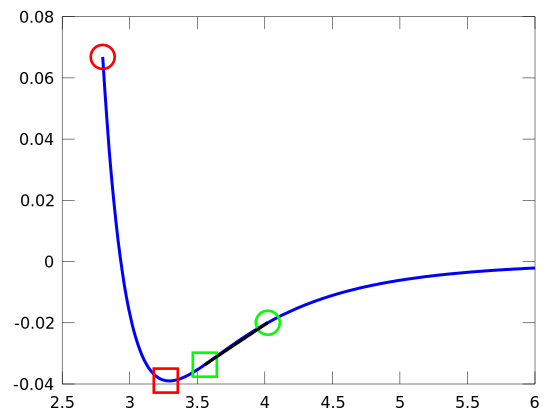

In [47]:
plot(x,Au_x(x),x_l,Au_x(x_l),'ro',x2,f2,'rs',x1,f1,'gs',x_u,Au_x(x_u),'go')
hold on;
if f2<f1
    plot([x_u,x1],[Au_x(x_u),f1],'k-')
    x_u=x1;
else 
    plot([x_l,x2],[Au_x(x_l),f2],'k-')
    x_l=x1;
end
hold off
old_min = current_min;
current_min=min([f1,f2,Au_x(x_l),Au_x(x_u)])
error_app=abs((current_min-old_min)/current_min)

# Automate as function `goldmin.m`

In [ ]:
function [x,fx,ea,iter]=goldmin(f,xl,xu,es,maxit)
% goldmin: minimization golden section search
%   [x,fx,ea,iter]=goldmin(f,xl,xu,es,maxit,p1,p2,...):
%     uses golden section search to find the minimum of f
% input:
%   f = name of function
%   xl, xu = lower and upper guesses
%   es = desired relative error (default = 0.0001%)
%   maxit = maximum allowable iterations (default = 50)
%   p1,p2,... = additional parameters used by f
% output:
%   x = location of minimum
%   fx = minimum function value
%   ea = approximate relative error (%)
%   iter = number of iterations
if nargin<3,error('at least 3 input arguments required'),end
if nargin<4|isempty(es), es=0.0001;end
if nargin<5|isempty(maxit), maxit=50;end
phi=(1+sqrt(5))/2;
iter=0;
while(1)
  d = (phi-1)*(xu - xl);
  x1 = xl + d;
  x2 = xu - d;
  if f(x1) < f(x2)
    xopt = x1;
    xl = x2;
  else
    xopt = x2;
    xu = x1;
  end
  iter=iter+1;
  if xopt~=0, ea = (2 - phi) * abs((xu - xl) / xopt) * 100;end
  if ea <= es | iter >= maxit,break,end
end
x=xopt;fx=f(xopt,varargin{:});

^C


# Minimization with goldmin

In [50]:
[xopt,fmin,ea,iters]=goldmin(Au_x,2.5,6,0.001)

xopt =  3.2933
fmin = -0.039000
ea =    6.3350e-04
iters =  23


# Thanks

## Parabolic Interpolation

Near a minimum/maximum, the function resembles a parabola. With three data points, it is possible to fit a parabola to the function. So, given a lower and upper bound, we can choose the midpoint and fit a parabola to the 3 x,f(x) coordinates. 

$$ x_{4} =x_{2} - \frac{1}{2}\frac{\left(x_{2} -x_{1}\right)^{2}  \left(f\left(x_{2}  \right)-f \left(x_{3} \right) \right)- \left(x_{2} -x_{3}  \right)^{2}\left(f \left(x_{2}  \right)-f \left(x_{1}  \right) \right)}{ \left(x_{2} -x_{1}  \right) \left(f \left(x_{2}  \right)-f \left(x_{3}  \right)\right)- \left(x_{2} -x_{3}  \right) \left(f \left(x_{2}  \right)-f \left(x_{1} \right) \right)}$$

Where $x_{4}$ location of the maximum or minimum of the parabola. 

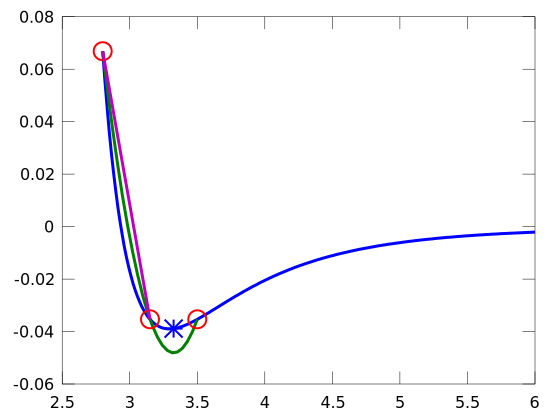

In [23]:
% define Au atomic potential
epsilon = 0.039; % kcal/mol
sigma = 2.934; % Angstrom
Au_x= @(x) lennard_jones(x,sigma,epsilon);

% set initial limits
x_l=2.8; 
x_u=3.5; 

% Iteration #1
x1=x_l;
x2=mean([x_l,x_u]);
x3=x_u;

% evaluate Au_x(x1), Au_x(x2) and Au_x(x3)
 
f1=Au_x(x1);
f2=Au_x(x2);
f3=Au_x(x3);
p = polyfit([x1,x2,x3],[f1,f2,f3],2);
x_fit = linspace(x1,x3,20);
y_fit = polyval(p,x_fit);

plot(x,Au_x(x),x_fit,y_fit,[x1,x2,x3],[f1,f2,f3],'o')
hold on
if f2<f1 && f2<f3
    x4=x2-0.5*((x2-x1)^2*(f2-f3)-(x2-x3)^2*(f2-f1))/((x2-x1)...
    *(f2-f3)-(x2-x3)*(f2-f1));
    f4=Au_x(x4);

    if x4>x2
        plot(x4,f4,'*',[x1,x2],[f1,f2])
        x1=x2;
        f1=f2;
    else
        plot(x4,f4,'*',[x3,x2],[f3,f2])
        x3=x2;
        f3=f2;
    end
    x2=x4; f2=f4;
else
    error('no minimum in bracket')
end
hold off

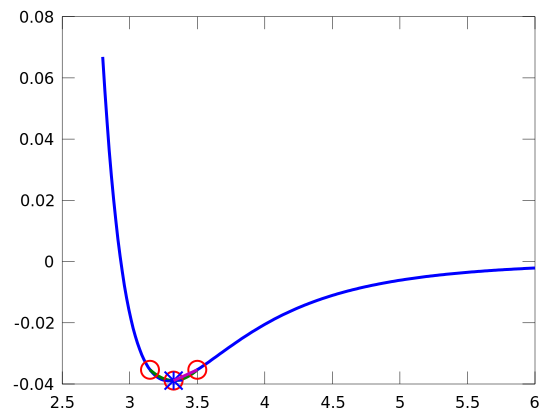

In [24]:
p = polyfit([x1,x2,x3],[f1,f2,f3],2);
x_fit = linspace(x1,x3,20);
y_fit = polyval(p,x_fit);

plot(x,Au_x(x),x_fit,y_fit,[x1,x2,x3],[f1,f2,f3],'o')
hold on
if f2<f1 && f2<f3
    x4=x2-0.5*((x2-x1)^2*(f2-f3)-(x2-x3)^2*(f2-f1))/((x2-x1)...
    *(f2-f3)-(x2-x3)*(f2-f1));
    f4=Au_x(x4);

    if x4>x2
        plot(x4,f4,'*',[x1,x2],[f1,f2])
        x1=x2;
        f1=f2;
    else
        plot(x4,f4,'*',[x3,x2],[f3,f2])
        x3=x2;
        f3=f2;
    end
    x2=x4; f2=f4;
else
    error('no minimum in bracket')
end
hold off


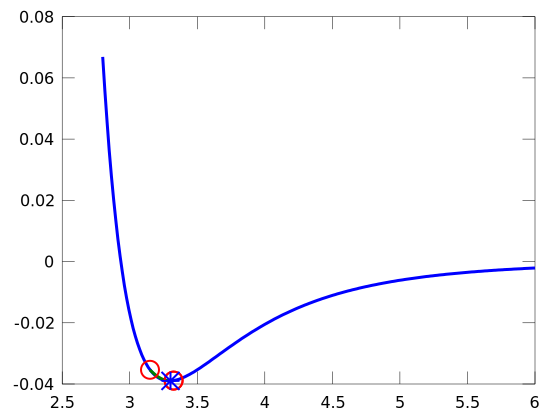

In [25]:
p = polyfit([x1,x2,x3],[f1,f2,f3],2);
x_fit = linspace(x1,x3,20);
y_fit = polyval(p,x_fit);

plot(x,Au_x(x),x_fit,y_fit,[x1,x2,x3],[f1,f2,f3],'o')
hold on
if f2<f1 && f2<f3
    x4=x2-0.5*((x2-x1)^2*(f2-f3)-(x2-x3)^2*(f2-f1))/((x2-x1)...
    *(f2-f3)-(x2-x3)*(f2-f1));
    f4=Au_x(x4);

    if x4>x2
        plot(x4,f4,'*',[x1,x2],[f1,f2])
        x1=x2;
        f1=f2;
    else
        plot(x4,f4,'*',[x3,x2],[f3,f2])
        x3=x2;
        f3=f2;
    end
    x2=x4; f2=f4;
else
    error('no minimum in bracket')
end
hold off


Parabolic interpolation does not always converge despite being a bracketing method. 

Instead, functions like `fminbnd` in Matlab and Octave use a combination of the two (Golden Ratio and Parabolic)

## Using the solutions to minimization for the nonlinear spring constant

Now, we have two routines to find minimums of a univariate function (Golden Ratio and Parabolic). Let's use these to solve for the minimum energy given a range of applied forces to the single atom gold chain

$E_{total}(\Delta x) = E_{LJ}(x_{min}+\Delta x) - F \cdot \Delta x$

$1 aJ = 10^{-18} J = 1~nN* 1~nm = 10^{-9}N * 10^{-9} m$

xmin =  0.32933
Emin =   -2.7096e-04


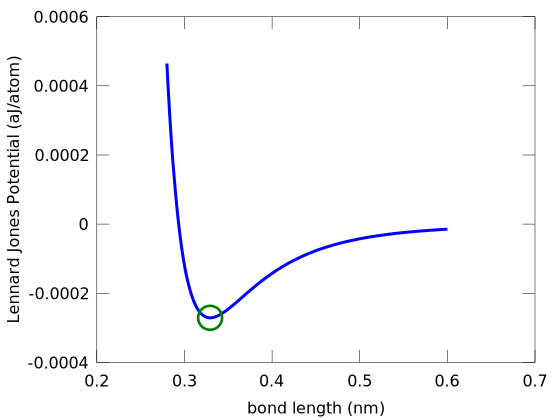

In [5]:
epsilon = 0.039; % kcal/mol
epsilon = epsilon*6.9477e-21; % J/atom
epsilon = epsilon*1e18; % aJ/J
% final units for epsilon are aJ

sigma = 2.934; % Angstrom
sigma = sigma*0.10; % nm/Angstrom
x=linspace(2.8,6,200)*0.10; % bond length in um
Ex = lennard_jones(x,sigma,epsilon);

[xmin,Emin] = goldmin(@(x) lennard_jones(x,sigma,epsilon),0.28,0.6)

plot(x,Ex,xmin,Emin,'o')
ylabel('Lennard Jones Potential (aJ/atom)')
xlabel('bond length (nm)')

Etotal = @(dx,F) lennard_jones(xmin+dx,sigma,epsilon)-F.*dx;


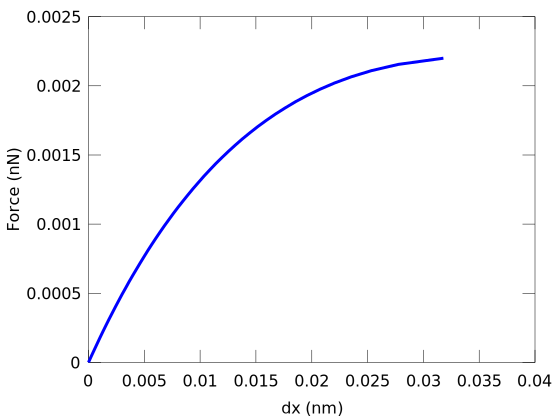

In [31]:
N=50;
warning('off')
dx = zeros(1,N); % [in nm]
F_applied=linspace(0,0.0022,N); % [in nN]
for i=1:N
    optmin=goldmin(@(dx) Etotal(dx,F_applied(i)),-0.001,0.035);
    dx(i)=optmin;
end

plot(dx,F_applied)
xlabel('dx (nm)')
ylabel('Force (nN)')

For this function, it is possible to take a derivative and compare the analytical result:

dE/dx = 0 = d(E_LJ)/dx - F

F= d(E_LJ)/dx

F =

@(dx) 4 * epsilon * 6 * (sigma ^ 6 ./ (xmin + dx) .^ 7 - 2 * sigma ^ 12 ./ (xmin + dx) .^ 13)



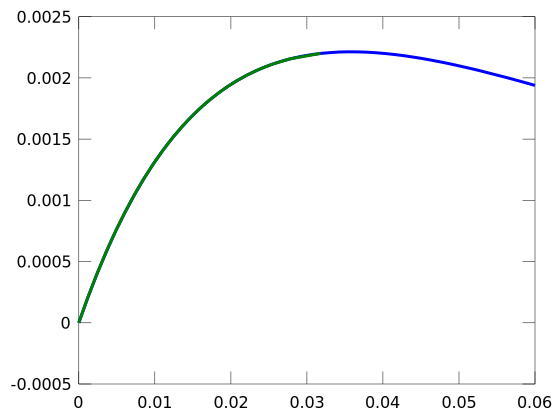

In [32]:
dx_full=linspace(0,0.06,50);
F= @(dx) 4*epsilon*6*(sigma^6./(xmin+dx).^7-2*sigma^12./(xmin+dx).^13)
plot(dx_full,F(dx_full),dx,F_applied)

## Curve-fitting
Another example is minimizing error in your approximation of a function. If you have data (now we have Force-displacement data) we can fit this to a function, such as:

$F(x) = K_{1}\Delta x + \frac{1}{2} K_{2}(\Delta x)^{2}$


In [33]:
function SSE = sse_of_parabola(K,xdata,ydata)
    % calculate the sum of squares error for a parabola given a function, func, and xdata and ydata
    % output is SSE=sum of squares error
    K1=K(1);
    K2=K(2);
    y_function = K1*xdata+1/2*K2*xdata.^2;
    SSE = sum((ydata-y_function).^2);
end
    

In [34]:
[K,SSE_min]=fminsearch(@(K) sse_of_parabola(K,dx,F_applied),[1,1]);
fprintf('\nThe nonlinear spring constants are K1=%1.2f nN/nm and K2=%1.2f nN/nm^2\n',K)
fprintf('The mininum sum of squares error = %1.2e',SSE_min)


The nonlinear spring constants are K1=0.16 nN/nm and K2=-5.98 nN/nm^2
The mininum sum of squares error = 7.35e-08


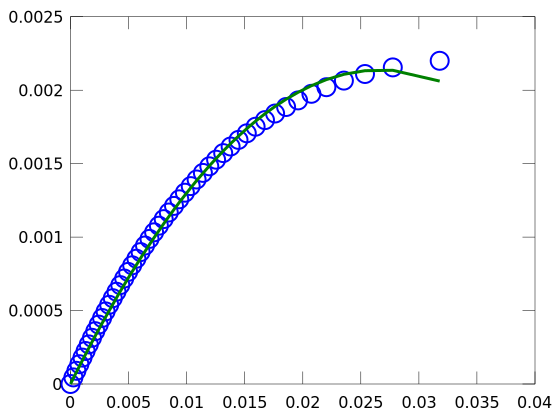

In [35]:
plot(dx,F_applied,'o',dx,K(1)*dx+1/2*K(2)*dx.^2)